# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import rc
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    rc('axes', edgecolor='lightgray')
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], alpha=0.85, s = 45, color = 'blue')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], alpha=0.85, s = 45, color = 'yellow')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

def display(m, b, color='g--'):
    rc('axes', edgecolor='lightgray')
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.grid(alpha=0.3)
    plt.plot(x, m*x+b, color, alpha=0.85)

## Reading and plotting the data

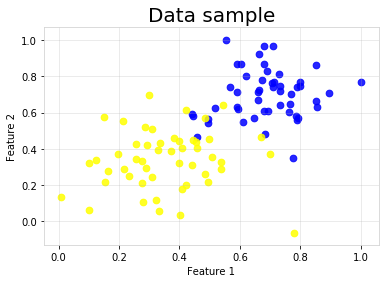

In [2]:
data = pd.read_csv('../data/data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])

plot_points(X,y)
plt.grid(alpha=0.3)
plt.title("Data sample", fontdict={"size": 20})

plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [3]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(features.dot(weights.T) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - y * np.log(output) - (1 - y) * np.log(1 - output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    pred =  output_formula(x, weights, bias)
    weights += learnrate * (y - pred) * x
    bias += learnrate * (y - pred)
    return weights, bias

def prediction(X, W, b):
    pred = X.dot(W.T) + b
    return stepFunction(pred).reshape(-1)

def stepFunction(x):
    if (type(x) == int) or (type(x) == float):
        return 1 - int(x < 0)
    else:
        return 1 - (x < 0).astype(int)


## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [4]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            
    # Plotting the solution boundary
    plt.title("Solution boundary", fontdict={"size": 20})
    display(-weights[0]/weights[1], -bias/weights[1], 'red')
    
    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot", fontdict={"size": 20})
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()
    return -weights[0]/weights[1], -bias/weights[1]

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


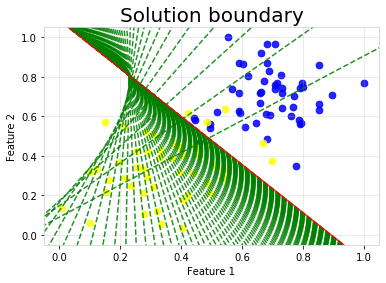

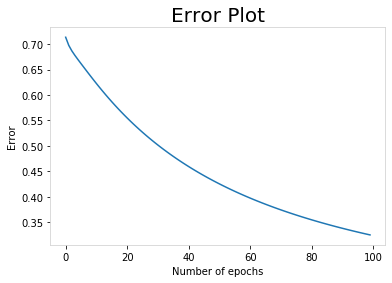

In [5]:
k, b = train(X, y, epochs, learnrate, True)

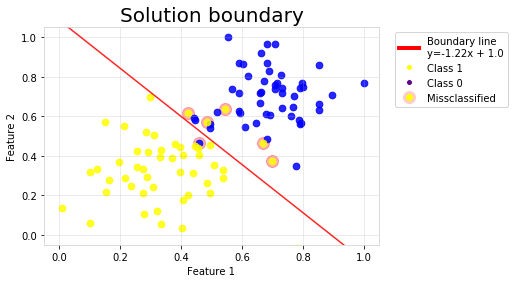

In [7]:
plt.title("Solution boundary", fontdict={"size": 20})
display(k, b, 'red')

miss_clasified_id = np.where(y != prediction(X, np.array([-k, 1]), -b))[0]
plt.scatter(X[miss_clasified_id, 0], X[miss_clasified_id, 1], c="red", alpha=0.3, s=145)
legend_elements = [Line2D([0], [0], color='r', lw=4,
                              label='Boundary line\ny={}x + {}'.format(round(k, 2), round(b))),
                       Line2D([0], [0], color="w",
                              marker="o", markerfacecolor="yellow", label='Class 1'),
                       Line2D([0], [0], color="w",
                              marker="o", markerfacecolor="#5e0087", label='Class 0'),
                       Line2D([0], [0], color="w",
                              marker="o", markerfacecolor="yellow", markeredgecolor="#FFCCCC",
                              markersize=10, markeredgewidth=3, label='Missclassified')
                       ]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.4, 1.))
# Plotting the data
plot_points(X, y)
plt.show()